# Comprehensive Analysis of Electronic Health Record Data using Python

In [114]:
# Importing the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date

## Basic Analysis and understanding of the data

In [2]:
# Load the datasets
patients = pd.read_csv(r"D:\DSML class\Real world data assignments\Python\EHR Analysis\Data\PATIENTS.csv")
admissions = pd.read_csv(r"D:\DSML class\Real world data assignments\Python\EHR Analysis\Data\ADMISSIONS.csv")
diagnosis = pd.read_csv(r"D:\DSML class\Real world data assignments\Python\EHR Analysis\Data\DIAGNOSES_ICD.csv")
icd = pd.read_csv(r"D:\DSML class\Real world data assignments\Python\EHR Analysis\Data\D_ICD_DIAGNOSES.csv")

## Observation of the data

In [3]:
print('\nFirst five rows of the Patients table')
patients.head(5)


First five rows of the Patients table


,row_id,subject_id,gender,dob
0,9467,10006,F,2094-03-05 0:00:00
1,9472,10011,F,2090-06-05 0:00:00
2,9474,10013,F,2038-09-03 0:00:00
3,9478,10017,F,2075-09-21 0:00:00
4,9479,10019,M,2114-06-20 0:00:00


In [4]:
patients.shape

(100, 4)

In [5]:
print('\nFirst five rows of the Admissions table')
admissions.head(5)


First five rows of the Admissions table


,row_id,subject_id,hadm_id,admittime,dischtime,deathtime,admission_type,admission_location,insurance,language,religion,marital_status,ethnicity,edregtime,edouttime,diagnosis,hospital_expire_flag
0,12258,10006,142345,2164-10-23 21:09:00,2164-11-01 17:15:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,Medicare,NaN,CATHOLIC,SEPARATED,BLACK/AFRICAN AMERICAN,2164-10-23 16:43:00,2164-10-23 23:00:00,SEPSIS,0
1,12263,10011,105331,2126-08-14 22:32:00,2126-08-28 18:59:00,2126-08-28 18:59:00,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,Private,NaN,CATHOLIC,SINGLE,UNKNOWN/NOT SPECIFIED,NaN,NaN,HEPATITIS B,1
2,12265,10013,165520,2125-10-04 23:36:00,2125-10-07 15:13:00,2125-10-07 15:13:00,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,Medicare,NaN,CATHOLIC,NaN,UNKNOWN/NOT SPECIFIED,NaN,NaN,SEPSIS,1
3,12269,10017,199207,2149-05-26 17:19:00,2149-06-03 18:42:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,Medicare,NaN,CATHOLIC,DIVORCED,WHITE,2149-05-26 12:08:00,2149-05-26 19:45:00,HUMERAL FRACTURE,0
4,12270,10019,177759,2163-05-14 20:43:00,2163-05-15 12:00:00,2163-05-15 12:00:00,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,Medicare,NaN,CATHOLIC,DIVORCED,WHITE,NaN,NaN,ALCOHOLIC HEPATITIS,1


In [6]:
admissions.shape

(129, 17)

In [7]:
print('\nFirst five rows of the Diagnosis table')
diagnosis.head(5)


First five rows of the Diagnosis table


,row_id,subject_id,hadm_id,icd9_code
0,112344,10006,142345,99591
1,112345,10006,142345,99662
2,112346,10006,142345,5672
3,112347,10006,142345,40391
4,112348,10006,142345,42731


In [8]:
diagnosis.shape

(1761, 4)

In [9]:
print('\nFirst five rows of the ICD codes table')
icd.head(5)


First five rows of the ICD codes table


,row_id,icd9_code,short_title,long_title
0,1,01716,Erythem nod tb-oth test,Erythema nodosum with hypersensitivity reactio...
1,2,01720,TB periph lymph-unspec,"Tuberculosis of peripheral lymph nodes, unspec..."
2,3,01721,TB periph lymph-no exam,"Tuberculosis of peripheral lymph nodes, bacter..."
3,4,01722,TB periph lymph-exam unk,"Tuberculosis of peripheral lymph nodes, bacter..."
4,5,01723,TB periph lymph-micro dx,"Tuberculosis of peripheral lymph nodes, tuberc..."


In [10]:
icd.shape

(14567, 4)

In [11]:
#Getting the overview of the dataset structure
patients.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   row_id      100 non-null    int64 
 1   subject_id  100 non-null    int64 
 2   gender      100 non-null    object
 3   dob         100 non-null    object
dtypes: int64(2), object(2)
memory usage: 3.2+ KB


In [12]:
admissions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129 entries, 0 to 128
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   row_id                129 non-null    int64 
 1   subject_id            129 non-null    int64 
 2   hadm_id               129 non-null    int64 
 3   admittime             129 non-null    object
 4   dischtime             129 non-null    object
 5   deathtime             40 non-null     object
 6   admission_type        129 non-null    object
 7   admission_location    129 non-null    object
 8   insurance             129 non-null    object
 9   language              81 non-null     object
 10  religion              128 non-null    object
 11  marital_status        113 non-null    object
 12  ethnicity             129 non-null    object
 13  edregtime             92 non-null     object
 14  edouttime             92 non-null     object
 15  diagnosis             129 non-null    ob

In [13]:
diagnosis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1761 entries, 0 to 1760
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   row_id      1761 non-null   int64 
 1   subject_id  1761 non-null   int64 
 2   hadm_id     1761 non-null   int64 
 3   icd9_code   1761 non-null   object
dtypes: int64(3), object(1)
memory usage: 55.2+ KB


In [14]:
icd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14567 entries, 0 to 14566
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   row_id       14567 non-null  int64 
 1   icd9_code    14567 non-null  object
 2   short_title  14567 non-null  object
 3   long_title   14567 non-null  object
dtypes: int64(1), object(3)
memory usage: 455.3+ KB


In [15]:
#Checking the summary of numerical columns in admissions table
admissions.describe()

,row_id,subject_id,hadm_id,hospital_expire_flag
count,129.000000,129.000000,129.000000,129.000000
mean,28036.441860,28010.410853,152343.441860,0.310078
std,14036.548988,16048.502883,27858.788248,0.464328
min,12258.000000,10006.000000,100375.000000,0.000000
25%,12339.000000,10088.000000,128293.000000,0.000000
50%,39869.000000,40310.000000,157235.000000,0.000000
75%,40463.000000,42135.000000,174739.000000,1.000000
max,41092.000000,44228.000000,199395.000000,1.000000


In [16]:
#Unique values and it's count unique of all columns
print('\nUnique values of categorical columns in admissions table')
(admissions.select_dtypes(include='object')).nunique()


Unique values of categorical columns in admissions table


admittime             129
dischtime             129
deathtime              40
admission_type          3
admission_location      5
insurance               4
language                5
religion               10
marital_status          6
ethnicity               9
edregtime              92
edouttime              92
diagnosis              95
dtype: int64

In [17]:
print('\nUnique values of all columns in patients table')
patients.nunique()


Unique values of all columns in patients table


row_id        100
subject_id    100
gender          2
dob            99
dtype: int64

In [18]:
print('\nUnique values of categorical columns in diagnosis table')
(diagnosis.select_dtypes(include='object')).nunique()


Unique values of categorical columns in diagnosis table


icd9_code    580
dtype: int64

In [19]:
print('\nUnique values of categorical columns in icd table')
(icd.select_dtypes(include='object')).nunique()


Unique values of categorical columns in icd table


icd9_code      14567
short_title    14328
long_title     14562
dtype: int64

### Insights:
- The given dataset contains the data of 100 unique patients.
- The total number of icd9 codes provided is 14567 where as only 580 codes are being used in the data.

## Data Processing

In [20]:
#Checking for missing values
patients.isna().sum()

row_id        0
subject_id    0
gender        0
dob           0
dtype: int64

In [21]:
admissions.isna().sum()

row_id                   0
subject_id               0
hadm_id                  0
admittime                0
dischtime                0
deathtime               89
admission_type           0
admission_location       0
insurance                0
language                48
religion                 1
marital_status          16
ethnicity                0
edregtime               37
edouttime               37
diagnosis                0
hospital_expire_flag     0
dtype: int64

In [22]:
diagnosis.isna().sum()

row_id        0
subject_id    0
hadm_id       0
icd9_code     0
dtype: int64

In [23]:
icd.isna().sum()

row_id         0
icd9_code      0
short_title    0
long_title     0
dtype: int64

In [24]:
# Duplicate entry check
patients[patients.duplicated()]

,row_id,subject_id,gender,dob


In [25]:
admissions[admissions.duplicated()]

,row_id,subject_id,hadm_id,admittime,dischtime,deathtime,admission_type,admission_location,insurance,language,religion,marital_status,ethnicity,edregtime,edouttime,diagnosis,hospital_expire_flag


In [26]:
diagnosis[diagnosis.duplicated()]

,row_id,subject_id,hadm_id,icd9_code


In [27]:
icd[icd.duplicated()]

,row_id,icd9_code,short_title,long_title


In [96]:
#Converting date columns type from object to datetime
patients['dob'] = pd.to_datetime(patients['dob'])
admissions['admittime'] = pd.to_datetime(admissions['admittime'])
admissions['dischtime'] = pd.to_datetime(admissions['dischtime'])
admissions['deathtime'] = pd.to_datetime(admissions['deathtime'])
admissions['edregtime'] = pd.to_datetime(admissions['edregtime'])
admissions['edouttime'] = pd.to_datetime(admissions['edouttime'])

## Demographic Analysis

In [98]:
#Joining the Patients table and Admissions table for further analysis
admpt = admissions.merge(patients[['subject_id', 'gender', 'dob']], how='left',on='subject_id')

### Gender Distribution

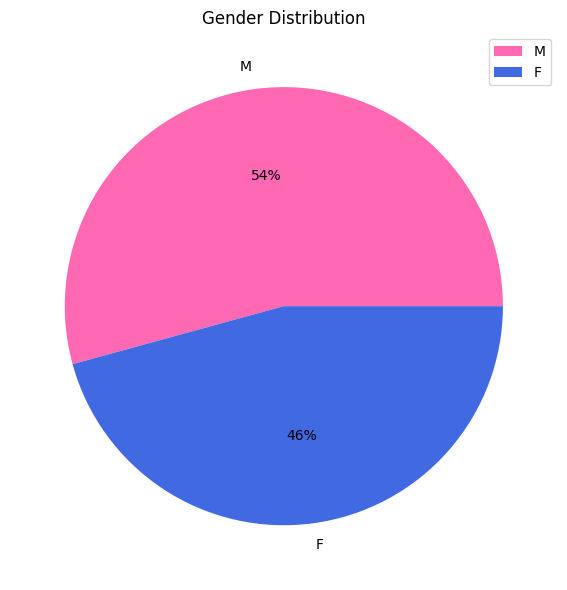

In [100]:
plt.figure(figsize=(10,6))
ax = admpt['gender'].value_counts().plot(kind='pie', autopct='%1.0f%%', colors=['hotpink', 'royalblue'], legend=True, ylabel='')
plt.title('Gender Distribution')
plt.tight_layout()
plt.show()

### Age group Analysis

In [125]:
#Creating the age column using dob
today=date.today()
admpt['dob'].apply(lambda x: x.year-today.year)

0       70
1       66
2       14
3       51
4       90
      ... 
124     33
125   -146
126     54
127     83
128     88
Name: dob, Length: 129, dtype: int64

In [126]:
admpt['dob'][125]

Timestamp('1878-05-14 00:00:00')